In [1]:
from sklearn.datasets import make_regression
import numpy as np

In [10]:
X, y = make_regression(n_samples=4, n_features=1, n_informative=1, n_targets=1, noise=80, random_state=1)

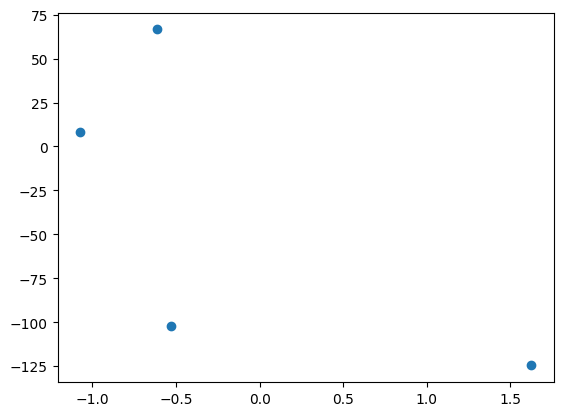

In [11]:
import matplotlib.pyplot as plt
plt.scatter(X, y)

In [12]:
# Applying OLS
from sklearn.linear_model import LinearRegression

In [13]:
reg = LinearRegression()

In [14]:
reg.fit(X,y)

LinearRegression()

In [15]:
reg.coef_

array([-50.61708585])

In [16]:
reg.intercept_

-45.44115263199092

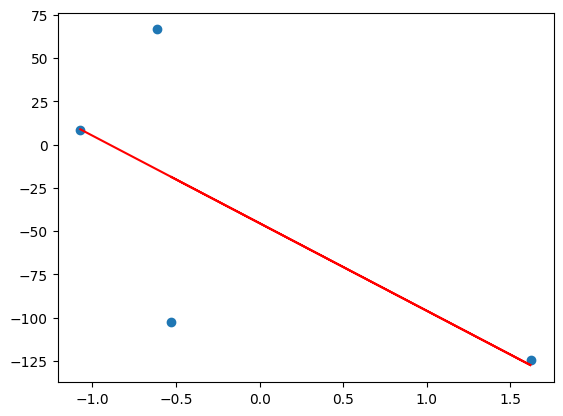

In [17]:
plt.scatter(X, y)
plt.plot(X, reg.predict(X), color='red')

In [18]:
# Applying Gradient Descent assuming slope is -50.61 and lets assume the starting value for intercept b =0

y_pred = ((-50.61 * X) + 0).reshape(4)

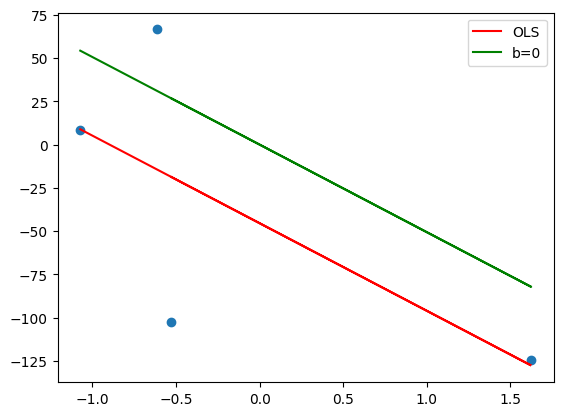

In [19]:
plt.scatter(X, y)
plt.plot(X, reg.predict(X), color='red', label='OLS')
plt.plot(X, y_pred, color='green', label='b=0')
plt.legend()
plt.show()

In [20]:
m = -50.61
b = 0

loss_slope = -2 * np.sum(y - m*X.ravel() - b)

In [21]:
loss_slope

363.52088028743583

In [36]:
# Let's Assume Learning rate as 0.1
lr = 0.1

step_size = loss_slope * lr

In [23]:
step_size

36.35208802874359

In [24]:
b = b - step_size

In [25]:
b

-36.35208802874359

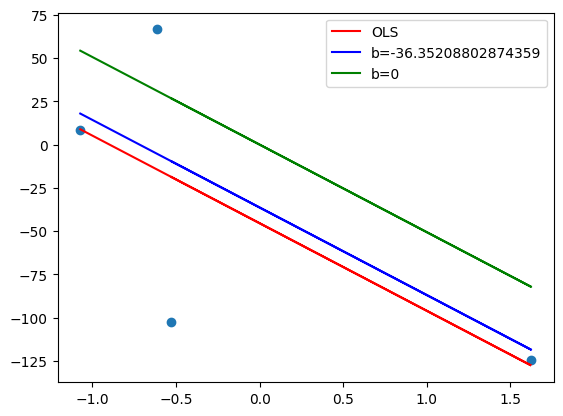

In [27]:
y_pred1 = ((-50.61 * X) + b).reshape(4)

plt.scatter(X, y)
plt.plot(X, reg.predict(X), color='red', label='OLS')
plt.plot(X, y_pred1, color='blue', label='b={}'.format(b))
plt.plot(X, y_pred, color='green', label='b=0')
plt.legend()
plt.show()

In [31]:
# Iteration 2
loss_slope = -2 * np.sum(y - m*X.ravel() - b)
step_size = loss_slope * lr
b = b - step_size

In [35]:
b

-45.07658915564204

In [32]:
y_pred2 = ((-50.61 * X) + b).reshape(4)

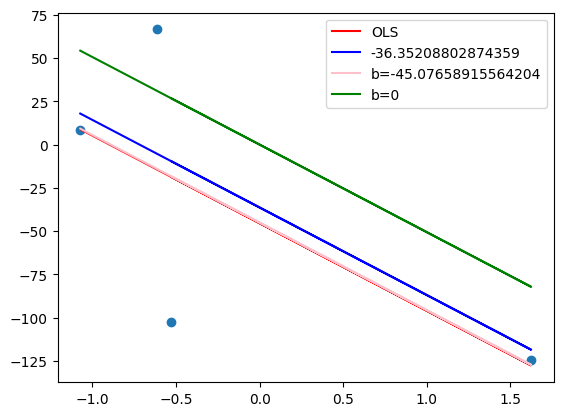

In [37]:
plt.scatter(X, y)
plt.plot(X, reg.predict(X), color='red', label='OLS')
plt.plot(X, y_pred1, color='blue', label='-36.35208802874359')
plt.plot(X, y_pred2, color='pink', label='b={}'.format(b))
plt.plot(X, y_pred, color='green', label='b=0')
plt.legend()
plt.show()

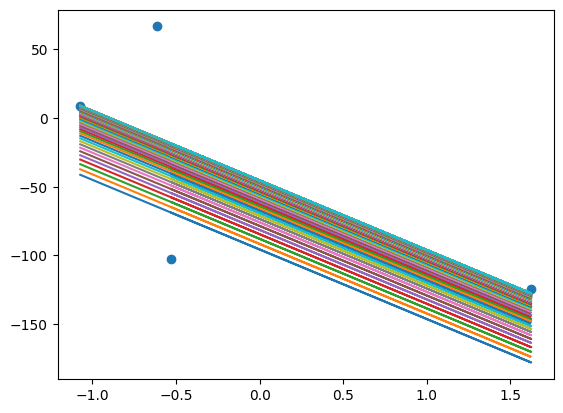

In [42]:
b = -100
m = -50.61
lr = 0.01

eopchs = 100

for i in range(eopchs):
    loss_slope = -2 * np.sum(y - m*X.ravel() - b)
    b = b - (loss_slope * lr)

    y_pred = m * X + b

    plt.plot(X, y_pred)

plt.scatter(X, y)
plt.show()

## Making a GD Class

In [73]:
from sklearn.datasets import make_regression
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [76]:
X, y = make_regression(n_samples=500, n_features=1, n_informative=1, n_targets=1, noise=20, random_state=42)

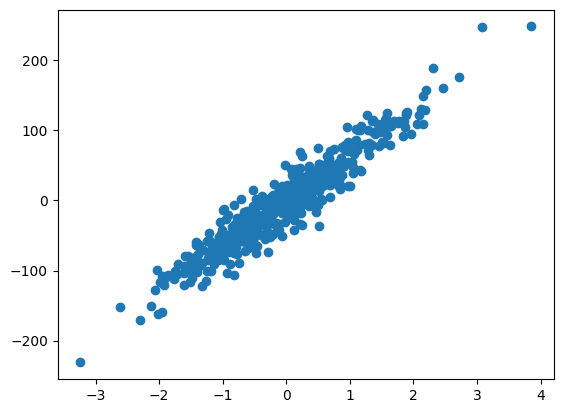

In [77]:
plt.scatter(X, y)

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [79]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train, y_train)
print(reg.coef_, reg.intercept_)


[62.91154316] -1.0306112713112259


In [81]:
y_pred = reg.predict(X_test)
r2_score(y_test, y_pred)

0.9024686518135113

In [82]:
class GDRegressor:

    def __init__(self, learning_rate, epochs):
        self.m = 100
        self.b = -120
        self.lr = learning_rate
        self.epochs = epochs

    def fit(self, X, y):
        # Calculate b using gradient descent
        for i in range(self.epochs):
            # For m
            loss_slope_m = -2 * np.sum((y - self.m * X.ravel() - self.b)*X.ravel())
            # For b
            loss_slope_b = -2 * np.sum(y - self.m * X.ravel() - self.b)
            # updation
            self.m = self.m - (loss_slope_m * self.lr)
            self.b = self.b - (loss_slope_b * self.lr)

        print(self.m,self.b)

    def predict(self, X):
        return self.m * X + self.b


In [83]:
gd = GDRegressor(learning_rate=0.001, epochs=100)
gd.fit(X_train, y_train)

62.91154316093058 -1.0306112713112259


In [85]:
gd.predict(X)

array([[-5.18819037e+01],
       [ 5.07155457e+00],
       [ 2.87414980e+01],
       [-9.40467113e+01],
       [-2.52712843e+01],
       [-3.20460609e+01],
       [ 1.36733270e+02],
       [ 1.32477510e+02],
       [ 2.14783437e+01],
       [ 5.11434282e+00],
       [-5.08893139e+01],
       [ 4.74220078e+00],
       [-7.84661848e+01],
       [-2.25913104e+01],
       [-3.87911812e+01],
       [ 7.04095755e+01],
       [-3.88849028e+01],
       [ 3.21708059e+00],
       [-9.98792439e+00],
       [-3.88177181e+01],
       [ 1.10036839e+02],
       [-3.64049874e+01],
       [ 3.88502127e+01],
       [ 1.24311951e+01],
       [ 1.85506163e+01],
       [ 1.14925414e+01],
       [-1.80107465e+00],
       [ 5.87620190e+01],
       [-6.81962600e+01],
       [-5.15031123e+01],
       [ 3.82337295e+01],
       [-1.93815152e+01],
       [-3.11762020e+01],
       [-6.47493800e+01],
       [-9.13629150e+01],
       [ 6.39233715e+01],
       [ 1.18299562e+02],
       [-4.26646190e+01],
       [ 7.3

In [84]:
r2_score(y_test, gd.predict(X_test))

0.9024686518135113